# Pandas繪圖筆記

### 有以下7種類型的圖###
+ 折線圖df.plot()
+ 柱狀圖df.plot(kind='bar')
+ 橫向柱狀圖df.plot(kind='barh')
+ 直方圖df.plot(kind='hist')
+ KDE圖df.plot(kind='kde')
+ 面積圖df.plot(kind='area')
+ 圓餅圖df.plot(kind='pie')
+ 散佈圖df.plot(kind='scatter')
+ 六角形箱體圖df.plot(kind='hexbin')
+ 箱形圖df.plot(kind='box')

## 1.初始化

In [22]:
import pandas as pd #引入Pandas模組 as pd
import seaborn as sns #引入seaborn模組 as sns
%matplotlib inline
pd.set_option("display.max_rows", 1000)    #設定最大能顯示1000rows
pd.set_option("display.max_columns", 1000) #設定最大能顯示1000columns

## 2.解決plot不能顯示中文問題

In [2]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']  
mpl.rcParams['axes.unicode_minus'] = False

## 3.讀取檔案

In [3]:
df=pd.read_excel('C:/Users/Yanwei/a.xlsx')

## 4.資料操作

### 4.1NaN與重複值處理

In [4]:
df=df.dropna()
df=df.drop_duplicates() 

In [5]:
df.head(30)

,監測日期,測站,SO2,CO,O3,PM10,PM25,Nox,NO,NO2,THC,NMHC,CH4,WS,TEMP,Humidity
0,2018-11-01,楠梓,3.4,0.53,35.2,75,50,27,6.20,21.14,2.23,0.245,1.988,1.76,23.86,76.08
1,2018-11-02,楠梓,3.7,0.49,24.2,74,44,31,7.08,24.41,2.30,0.307,1.995,1.79,23.11,77.29
2,2018-11-03,楠梓,2.5,0.41,12.4,50,34,27,4.52,22.57,2.21,0.239,1.967,2.00,22.84,81.49
3,2018-11-04,楠梓,2.9,0.40,21.6,54,34,26,5.58,20.49,2.17,0.227,1.940,1.81,23.45,76.63
4,2018-11-05,楠梓,2.1,0.27,21.6,25,14,17,2.65,14.77,1.97,0.100,1.864,2.60,21.13,77.82
5,2018-11-06,楠梓,2.5,0.36,40.6,47,30,15,2.47,12.06,2.14,0.191,1.946,1.99,23.55,72.03
6,2018-11-07,楠梓,2.9,0.49,37.7,61,38,21,2.22,18.52,2.18,0.210,1.969,1.59,22.65,75.60
7,2018-11-08,楠梓,3.5,0.44,28.7,65,31,23,3.13,19.78,2.14,0.170,1.973,2.34,22.46,70.93
8,2018-11-09,楠梓,2.7,0.56,34.1,85,39,20,2.81,17.42,2.19,0.181,2.013,2.75,23.35,74.16
9,2018-11-10,楠梓,3.3,0.49,41.3,63,34,23,3.25,19.47,2.21,0.230,1.978,2.12,24.94,76.69


### 4.2檢視資料類型(有無非數值類型存在)

In [6]:
df.dtypes

監測日期        datetime64[ns]
測站                  object
SO2                float64
CO                 float64
O3                 float64
PM10                 int64
PM25                 int64
Nox                  int64
NO                 float64
NO2                float64
THC                float64
NMHC               float64
CH4                float64
WS                 float64
TEMP               float64
Humidity           float64
dtype: object

#### 如果屬性是Object，如何改成數值屬性

df["屬於Object的欄位"] = pd.to_numeric(df.屬於Object的欄位, errors='coerce')

### 4.3相關係數

In [48]:
df.corr()

,SO2,CO,O3,PM10,PM25,Nox,NO,NO2,THC,NMHC,CH4,WS,TEMP,Humidity
SO2,1.000000,0.625044,0.375149,0.140711,0.266126,0.416505,0.258268,0.418404,0.414124,0.350661,0.330001,-0.264317,0.234754,-0.271583
CO,0.625044,1.000000,0.376914,0.420935,0.511374,0.459924,0.220034,0.509641,0.608212,0.421507,0.703985,-0.322743,0.287530,-0.135522
O3,0.375149,0.376914,1.000000,0.371972,0.488885,-0.354896,-0.385650,-0.312526,-0.038581,-0.098318,0.117530,-0.200980,0.516818,-0.532481
PM10,0.140711,0.420935,0.371972,1.000000,0.829229,-0.071352,-0.126007,-0.010711,0.391285,0.295845,0.434266,-0.438450,0.741995,0.221835
PM25,0.266126,0.511374,0.488885,0.829229,1.000000,0.032930,-0.104651,0.108559,0.431626,0.318694,0.472598,-0.469863,0.629267,0.048341
Nox,0.416505,0.459924,-0.354896,-0.071352,0.032930,1.000000,0.788391,0.961041,0.627497,0.579173,0.404538,-0.267625,-0.259757,0.024958
NO,0.258268,0.220034,-0.385650,-0.126007,-0.104651,0.788391,1.000000,0.595347,0.441302,0.399092,0.298337,-0.347144,-0.170636,0.178350
NO2,0.418404,0.509641,-0.312526,-0.010711,0.108559,0.961041,0.595347,1.000000,0.641319,0.598984,0.401096,-0.204648,-0.256691,-0.012940
THC,0.414124,0.608212,-0.038581,0.391285,0.431626,0.627497,0.441302,0.641319,1.000000,0.930130,0.641154,-0.505959,0.282384,0.089359
NMHC,0.350661,0.421507,-0.098318,0.295845,0.318694,0.579173,0.399092,0.598984,0.930130,1.000000,0.316099,-0.481961,0.208473,0.078501


## 5.繪圖

### 5.1折線圖

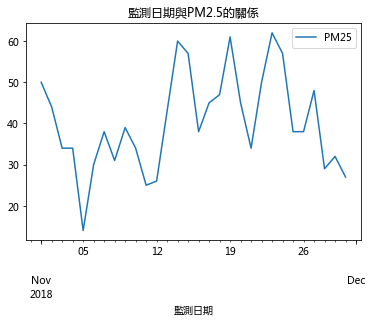

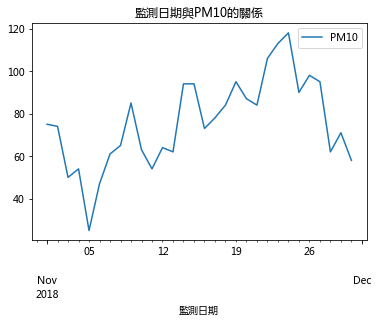

In [12]:
df.plot(x='監測日期', y='PM25',title='監測日期與PM2.5的關係')
df.plot(x='監測日期', y='PM10',title='監測日期與PM10的關係')

### 5.2柱狀圖

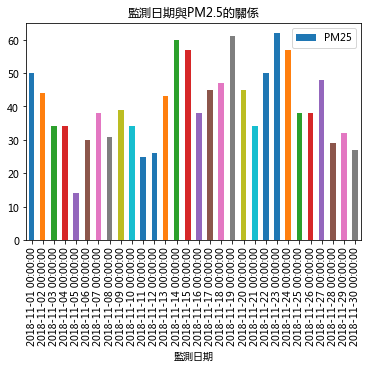

In [29]:
df.plot(kind='bar',x='監測日期', y='PM25',title='監測日期與PM2.5的關係')

### 5.2.1橫向柱狀圖

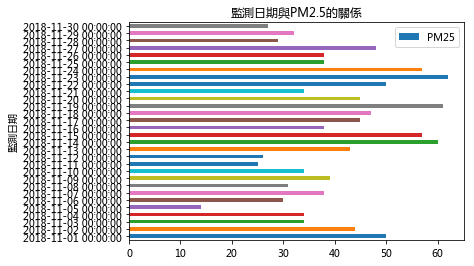

In [51]:
df.plot(kind='barh',x='監測日期', y='PM25',title='監測日期與PM2.5的關係')

### 5.3直方圖

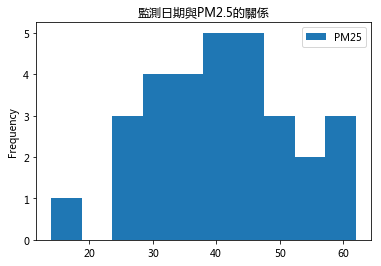

In [30]:
df.plot(kind='hist',x='監測日期', y='PM25',title='監測日期與PM2.5的關係')

### 5.4核密度(KDE)圖

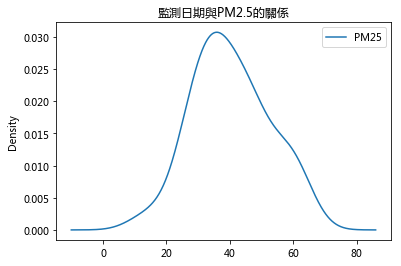

In [31]:
df.plot(kind='kde',x='監測日期', y='PM25',title='監測日期與PM2.5的關係')

### 5.5面積圖

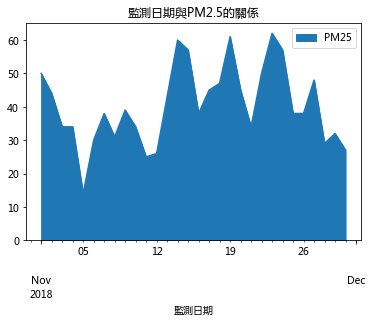

In [32]:
df.plot(kind='area',x='監測日期', y='PM25',title='監測日期與PM2.5的關係')

### 5.6圓餅圖

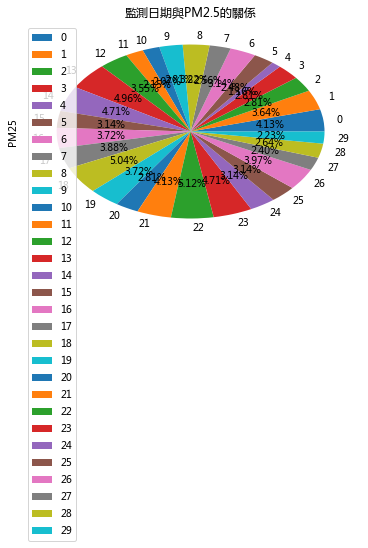

In [47]:
df.plot(kind='pie',x='監測日期', y='PM25',title='監測日期與PM2.5的關係',autopct = '%1.2f%%')

### 5.7散佈圖

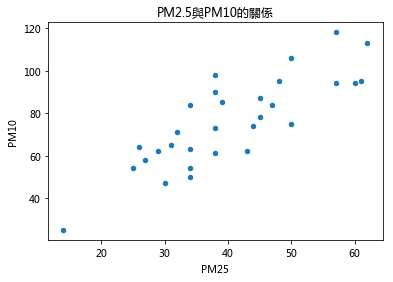

In [44]:
df.plot(kind='scatter',x='PM25', y='PM10',title='PM2.5與PM10的關係') #X,Y需為數值

### 5.8六角形箱體圖

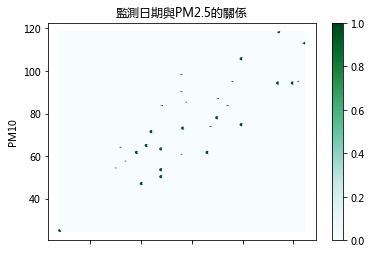

In [42]:
df.plot(kind='hexbin',x='PM25', y='PM10',title='PM2.5與PM10的關係') #X,Y需為數值

### 5.9箱形圖

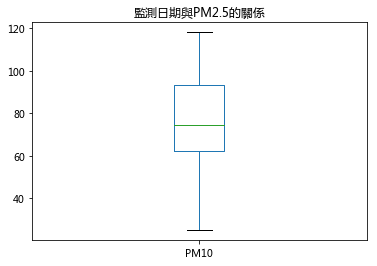

In [49]:
df.plot(kind='box',x='PM25', y='PM10',title='監測日期與PM2.5的關係') #X,Y需為數值